 ## REGRESION lINEAL

## 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
import pandas as pd

# Cargar datasets
df1 = pd.read_csv('C:/LINEAL/car data.csv')
df2 = pd.read_csv('C:/LINEAL/CAR DETAILS FROM CAR DEKHO.csv')  # corregí el espacio en la ruta
df3 = pd.read_csv('C:/LINEAL/Car details v3.csv')
df4 = pd.read_csv('C:/LINEAL/car details v4.csv')

# Mostrar columnas de cada dataset para comparar
print("df1:", df1.columns.tolist())
print("df2:", df2.columns.tolist())
print("df3:", df3.columns.tolist())
print("df4:", df4.columns.tolist())

# Unificar si las columnas coinciden
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
print("Tamaño total del dataset combinado:", df.shape)



df1: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
df2: ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']
df3: ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']
df4: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
Tamaño total del dataset combinado: (14828, 39)


In [12]:
# Estandarizar df1
df1_clean = df1.rename(columns={
    'Car_Name': 'name',
    'Year': 'year',
    'Selling_Price': 'selling_price',
    'Present_Price': 'present_price',
    'Kms_Driven': 'km_driven',
    'Fuel_Type': 'fuel',
    'Seller_Type': 'seller_type',
    'Transmission': 'transmission',
    'Owner': 'owner'
})

# Estandarizar df2
df2_clean = df2.copy()

# Estandarizar df3: mantener solo las columnas útiles
df3_clean = df3[['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']].copy()

# Estandarizar df4: renombrar columnas y quedarnos con las relevantes
df4_clean = df4.rename(columns={
    'Make': 'name',
    'Year': 'year',
    'Price': 'selling_price',
    'Kilometer': 'km_driven',
    'Fuel Type': 'fuel',
    'Transmission': 'transmission',
    'Owner': 'owner',
    'Seller Type': 'seller_type'
})[['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]




# Unir los datasets limpios
df_final = pd.concat([df1_clean, df2_clean, df3_clean, df4_clean], ignore_index=True)

# Verificar forma final
print("Shape final del dataset combinado:", df_final.shape)
df_final.head()



Shape final del dataset combinado: (14828, 9)


,name,year,selling_price,present_price,km_driven,fuel,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           14828 non-null  object 
 1   year           14828 non-null  int64  
 2   selling_price  14828 non-null  float64
 3   present_price  301 non-null    float64
 4   km_driven      14828 non-null  int64  
 5   fuel           14828 non-null  object 
 6   seller_type    14828 non-null  object 
 7   transmission   14828 non-null  object 
 8   owner          14828 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.0+ MB
None
               year  selling_price  present_price     km_driven
count  14828.000000   1.482800e+04     301.000000  1.482800e+04
mean    2013.955692   7.338985e+05       7.628472  6.593197e+04
std        4.121330   1.195352e+06       8.644115  5.404873e+04
min     1983.000000   1.000000e-01       0.320000  0.000000e+00
25%     2012.000000  

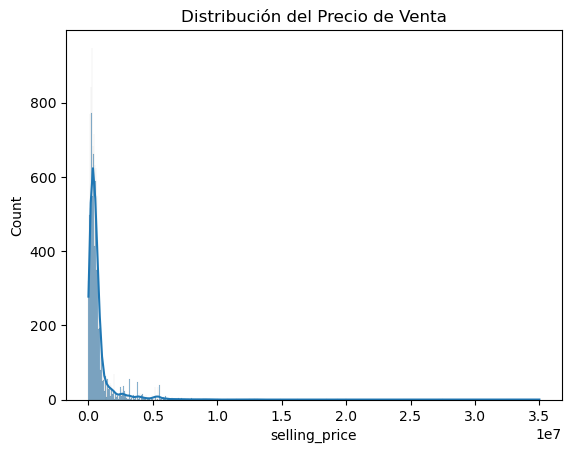

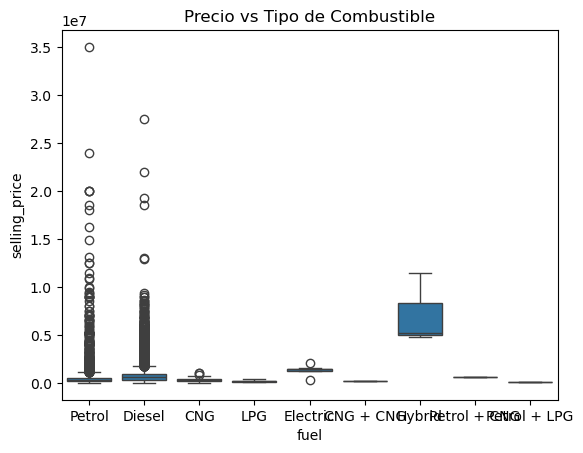

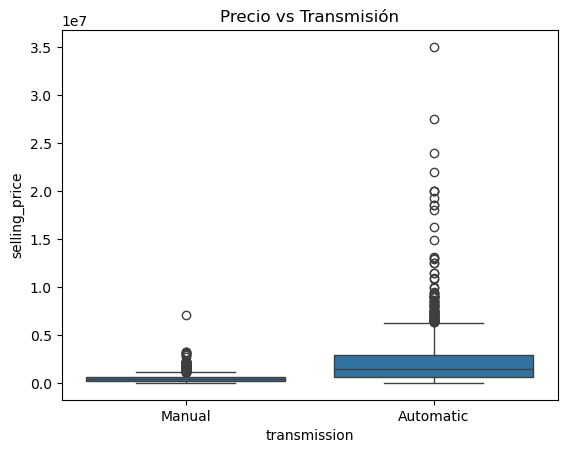

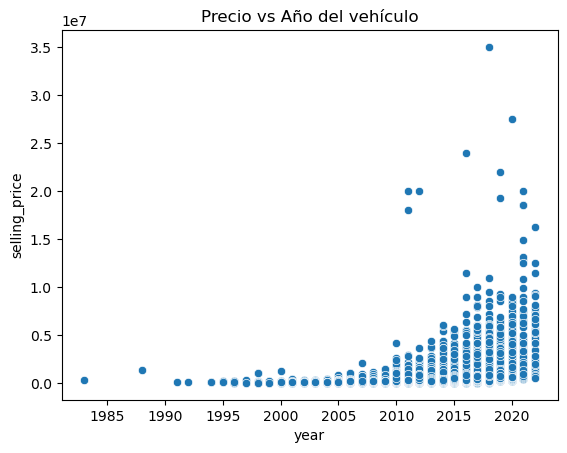

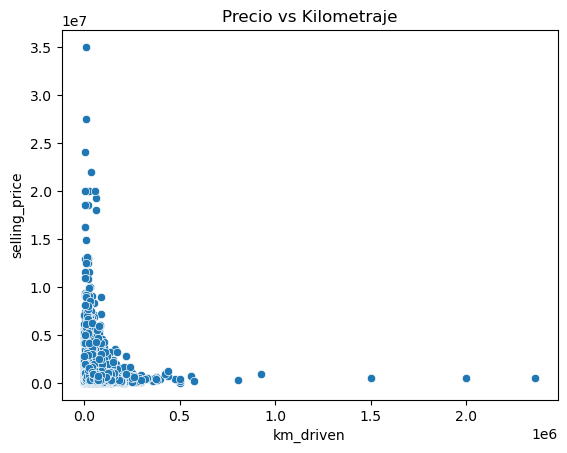

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Info general
print(df_final.info())
print(df_final.describe())

# Valores nulos
print("Valores faltantes por columna:")
print(df_final.isnull().sum())

# Histograma de precio
sns.histplot(df_final['selling_price'], kde=True)
plt.title("Distribución del Precio de Venta")
plt.show()

# Boxplot de precios por tipo de combustible
sns.boxplot(data=df_final, x='fuel', y='selling_price')
plt.title("Precio vs Tipo de Combustible")
plt.show()

# Boxplot por tipo de transmisión
sns.boxplot(data=df_final, x='transmission', y='selling_price')
plt.title("Precio vs Transmisión")
plt.show()

# Relación entre año y precio
sns.scatterplot(data=df_final, x='year', y='selling_price')
plt.title("Precio vs Año del vehículo")
plt.show()

# Relación entre km_driven y precio
sns.scatterplot(data=df_final, x='km_driven', y='selling_price')
plt.title("Precio vs Kilometraje")
plt.show()


## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Supongamos que ya tienes el dataframe unificado y limpio: df_final

# 1. Verificar valores faltantes en cada columna
print("Valores faltantes en cada columna:")
print(df_final.isnull().sum())

# Si la cantidad de registros con valores faltantes es muy baja, puedes eliminarlos:
df_clean = df_final.dropna()

# 2. Eliminar registros duplicados (si existen)
print("Número de registros duplicados antes:", df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates()
print("Número de registros duplicados después:", df_clean.duplicated().sum())

# 3. Conversión de tipos para variables numéricas:
# Las columnas "year", "selling_price" y "km_driven" deben ser numéricas.
df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
df_clean['selling_price'] = pd.to_numeric(df_clean['selling_price'], errors='coerce')
df_clean['km_driven'] = pd.to_numeric(df_clean['km_driven'], errors='coerce')

# Verifica si la conversión generó valores nulos y elimina aquellos registros.
df_clean = df_clean.dropna(subset=['year', 'selling_price', 'km_driven'])

# 4. Transformar variables categóricas en variables dummy
# Convertiremos las columnas: 'fuel', 'seller_type', 'transmission' y 'owner'
df_encoded = pd.get_dummies(df_clean, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# 5. (Opcional) Escalado/Normalización de variables numéricas:
# Esto puede ayudar a estandarizar la escala de variables como "km_driven" y "year" si lo requieres para el modelo.
scaler = StandardScaler()
df_encoded[['km_driven', 'year']] = scaler.fit_transform(df_encoded[['km_driven', 'year']])

# Revisar el dataframe preprocesado
print("Datos preprocesados listos:")
print(df_encoded.head())


Valores faltantes en cada columna:
name                 0
year                 0
selling_price        0
present_price    14527
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
dtype: int64
Número de registros duplicados antes: 2
Número de registros duplicados después: 0
Datos preprocesados listos:
      name      year  selling_price  present_price  km_driven  fuel_Diesel  \
0     ritz  0.132992           3.35           5.59  -0.254603        False   
1      sx4 -0.212787           4.75           9.54   0.156181         True   
2     ciaz  1.170329           7.25           9.85  -0.770651        False   
3  wagon r -0.904345           2.85           4.15  -0.814297        False   
4    swift  0.132992           4.60           6.87   0.142061         True   

   fuel_Petrol  seller_type_Individual  transmission_Manual  owner_1  owner_3  
0         True                   False                 True    False    False  
1     

## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

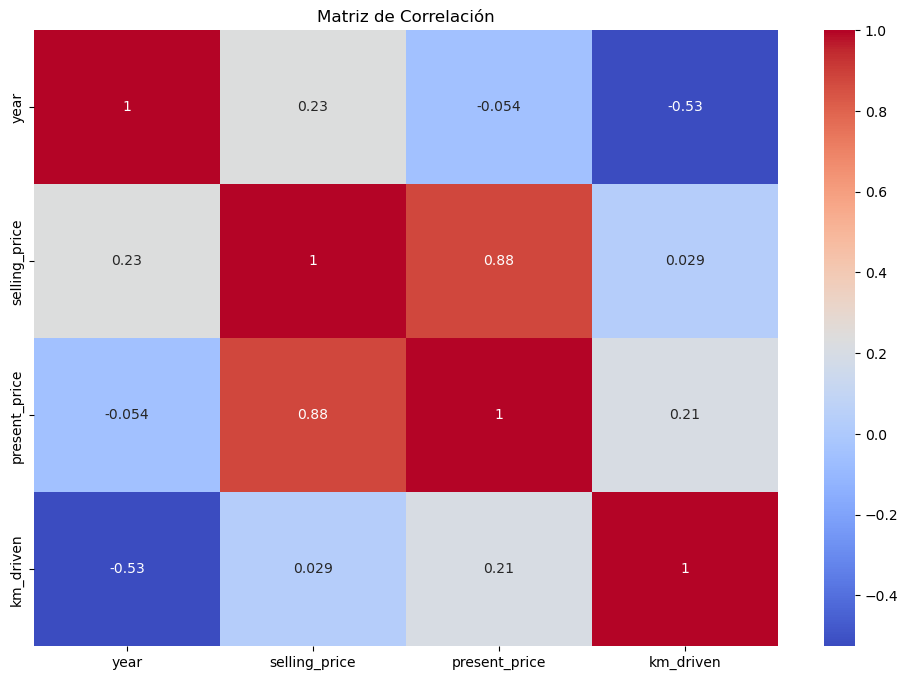

Correlación con selling_price:
selling_price    1.000000
present_price    0.876378
year             0.234369
km_driven        0.028566
Name: selling_price, dtype: float64


In [22]:
# Eliminar columnas no numéricas
df_corr = df_encoded.select_dtypes(include=['int64', 'float64'])

# Ahora sí podemos calcular la matriz de correlación
plt.figure(figsize=(12, 8))
correlation = df_corr.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# Ver correlación con la variable objetivo
correlation_target = correlation['selling_price'].sort_values(ascending=False)
print("Correlación con selling_price:")
print(correlation_target)



In [26]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Copia limpia del dataframe
df_model = df_encoded.copy()

# Eliminar columnas no numéricas o poco útiles para predicción
columnas_a_eliminar = ['name', 'Car_Name', 'torque', 'Model', 'Location', 'Color', 'Drivetrain']
df_model.drop(columns=[col for col in columnas_a_eliminar if col in df_model.columns], inplace=True)

# Asegurar que la columna objetivo está presente y no tiene valores faltantes
df_model = df_model[df_model['selling_price'].notna()]

# Definir X (predictoras) y y (variable objetivo)
X = df_model.drop('selling_price', axis=1)
y = df_model['selling_price']

# Convertir todas las variables categóricas a numéricas (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Confirmamos que todas son numéricas
print("Columnas numéricas de X:", X.columns.tolist())

# Seleccionar las mejores características
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Mostrar puntuaciones
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("Ranking de características relevantes:")
print(feature_scores)


Columnas numéricas de X: ['year', 'present_price', 'km_driven', 'fuel_Diesel', 'fuel_Petrol', 'seller_type_Individual', 'transmission_Manual', 'owner_1', 'owner_3']
Ranking de características relevantes:
                  Feature       Score
1           present_price  983.386075
5  seller_type_Individual  131.417193
3             fuel_Diesel  124.537512
4             fuel_Petrol  117.016379
6     transmission_Manual   41.156813
0                    year   17.262108
7                 owner_1    2.875951
2               km_driven    0.242548
8                 owner_3    0.175871


In [28]:
from sklearn.linear_model import LinearRegression

# Entrenar un modelo simple
model = LinearRegression()
model.fit(X, y)

# Ver importancia de cada variable (coeficientes absolutos)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_)
}).sort_values(by='Importance', ascending=False)

print("Importancia de características según regresión lineal:")
print(importance)


Importancia de características según regresión lineal:
                  Feature  Importance
8                 owner_3    5.763285
3             fuel_Diesel    2.359619
6     transmission_Manual    1.439459
5  seller_type_Individual    1.107544
4             fuel_Petrol    0.586206
7                 owner_1    0.461898
1           present_price    0.438731
0                    year    0.397390
2               km_driven    0.000006


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo


In [32]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto en 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verificamos tamaños
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (239, 9)
Tamaño del conjunto de prueba: (60, 9)


## 5. Entrenar el modelo configurando los diferentes hiperparámetros. 

In [34]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Mostrar coeficientes y la intersección (bias)
print("Coeficientes:", modelo.coef_)
print("Intercepción:", modelo.intercept_)


Coeficientes: [ 3.31040961e-01  4.37186741e-01 -1.05181127e-05  2.13911103e+00
  6.90622132e-01 -1.30137688e+00 -1.57212521e+00  6.42855635e-01
  0.00000000e+00]
Intercepción: -664.0591876643279


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones del modelo
y_pred = modelo.predict(X_test)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print( "Evaluación del Modelo de Regresión:")
print("MAE  (Error Absoluto Medio):", round(mae, 2))
print("MSE  (Error Cuadrático Medio):", round(mse, 2))
print("RMSE (Raíz del MSE):", round(rmse, 2))
print("R²   (Coeficiente de Determinación):", round(r2, 4))


Evaluación del Modelo de Regresión:
MAE  (Error Absoluto Medio): 1.44
MSE  (Error Cuadrático Medio): 5.94
RMSE (Raíz del MSE): 2.44
R²   (Coeficiente de Determinación): 0.7696


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 

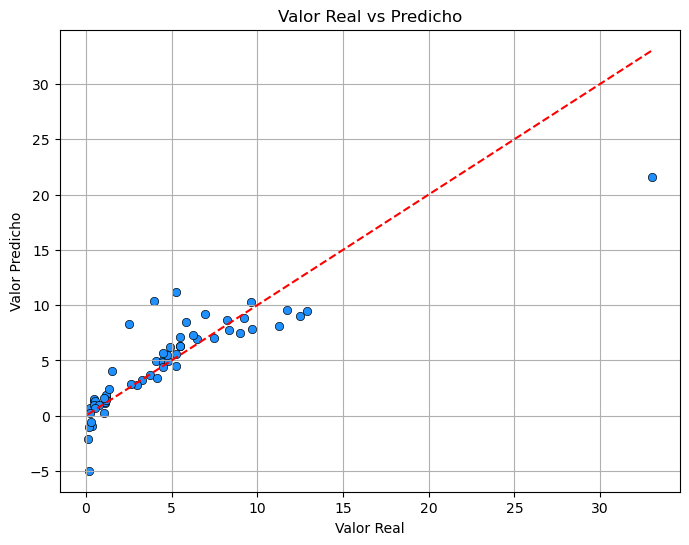

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Valor Real vs Predicho")
plt.grid(True)
plt.show()


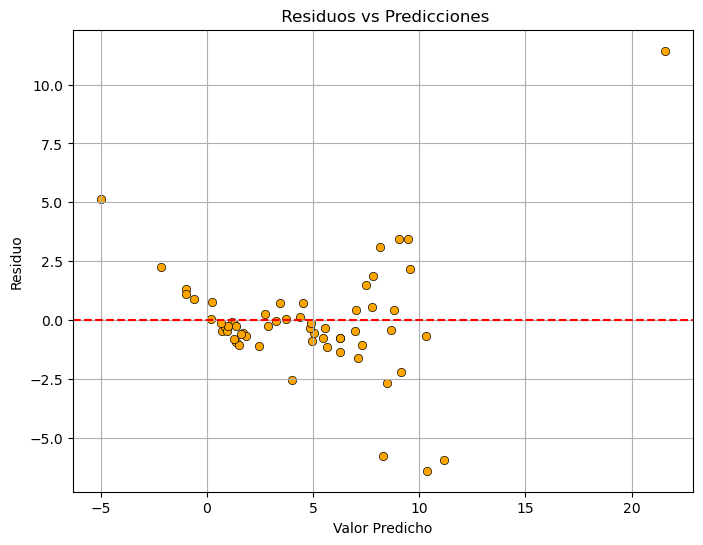

In [49]:
residuos = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuos, color='orange', edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valor Predicho")
plt.ylabel("Residuo")
plt.title(" Residuos vs Predicciones")
plt.grid(True)
plt.show()


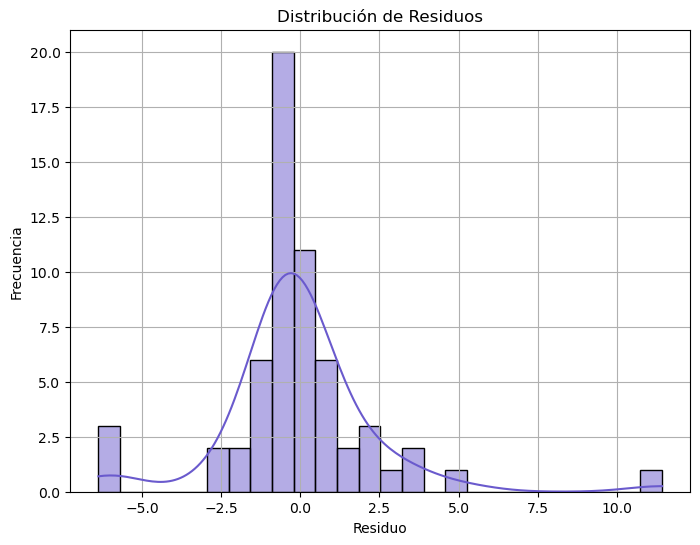

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, color='slateblue')
plt.title("Distribución de Residuos")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


## 8. Interpretar, analizar y documentar los resultados obtenidos.                                                           

El análisis de evaluación reveló que la variable con mayor relación con el precio de venta ( selling_price) es el precio actual del vehículo ( present_price), con una evaluación de 0.87 . Esto indica una fuerte relación lineal positiva, lo cual era esperable, ya que un vehículo con mayor precio original tiende a tener un mayor valor de reventa.

En contraste, variables como el año de fabricación ( year) mostraron una correlación más baja ( 0.23 ), y el kilometraje ( km_driven) casi nula ( 0.02 ), lo cual sugiere que estos factores tienen menor impacto lineal sobre el precio de venta. Sin embargo, es importante considerar que pueden influir de forma no lineal o en combinación con otras variables.El gráfico de dispersión entre los valores reales y los valores predichos muestra una alineación bastante cercana a la línea de referencia, lo que indica que el modelo tiene una buena capacidad de predicción . Aunque se observa un valor atípico importante que se aleja del resto, la mayoría de los puntos siguen una tendencia lineal adecuada.
Este tipo de visualización es fundamental para confirmar que el modelo generaliza bien y no comete errores graves al predecir precios dentro del rango común.

El análisis de residuos permite evaluar la calidad del ajuste. En este caso, los residuos (errores entre el valor real y el predicho) se distribuyen de manera aleatoria alrededor del eje 0 , lo que es deseable. Esto indica que el modelo no presenta un sistema sistemático al hacer sus predicciones.
Sin embargo, algunos residuos tienen valores grandes, lo que sugiere la presencia de valores atípicos o datos que el modelo no logra explicar bien.

El histograma de residuos muestra que la mayoría de los errores están concentrados cerca de cero, con una forma similar a la distribución normal. Sin embargo, se detecta una ligera asimetría y presencia de valores extremos , lo cual puede afectar la precisión del modelo en algunos casos.Esta visualización respalda la necesidad de considerar una posible transformación de variables o el uso de modelos más complejos en futuras iteraciones.

